# Importing the required libraries


In [132]:
# Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Import Classification Report function
from sklearn.metrics import classification_report

#Import cross validation score
from sklearn.model_selection import cross_val_score


#Examine Dataset


Read the data

In [10]:
# Read the "insurance.csv" file
insurance = pd.read_csv("/content/insurance.csv")
insurance_df = insurance.copy()

Visualize the data

In [37]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
# head() function to display the first 5 rows of the data
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Perform An Exploratory Data Analysis

In [39]:
#describe and transpose
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [40]:
# to detect missing values
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [41]:
#o get a concise summary of the dataframe
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

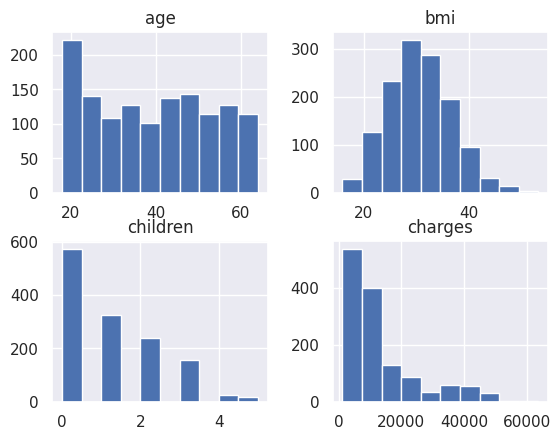

In [44]:
#attribute histogram matrix
insurance_df.hist()

In [42]:
#Examine the distribution of Bmi (Body Mass Index)
insurance_df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [49]:
#Examine the relationship between “smoker” and “charges”
insurance_df[['smoker','charges']]

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
...,...,...
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350
1336,no,2007.94500


In [47]:
# Examine the relationship between “smoker” and “region”.
insurance_df[['smoker','region']]

,smoker,region
0,yes,southwest
1,no,southeast
2,no,southeast
3,no,northwest
4,no,northwest
...,...,...
1333,no,northwest
1334,no,northeast
1335,no,southeast
1336,no,southwest


In [48]:
#Examine the relationship between “bmi” and “sex”.
insurance_df[['bmi','sex']]

,bmi,sex
0,27.900,female
1,33.770,male
2,33.000,male
3,22.705,male
4,28.880,male
...,...,...
1333,30.970,male
1334,31.920,female
1335,36.850,female
1336,25.800,female


In [51]:
#Find the "region" with the most "children"
insurance_df[['region','children']].max()

region      southwest
children            5
dtype: object

In [52]:
#Examine the relationship between “age” and “bmi”
insurance_df[['age','bmi']]

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [63]:
#Examine the relationship between “bmi” and “children”.
insurance_df[['bmi','children']]

,bmi,children
0,27.900,0
1,33.770,1
2,33.000,3
3,22.705,0
4,28.880,0
...,...,...
1333,30.970,3
1334,31.920,0
1335,36.850,0
1336,25.800,0


<Axes: >

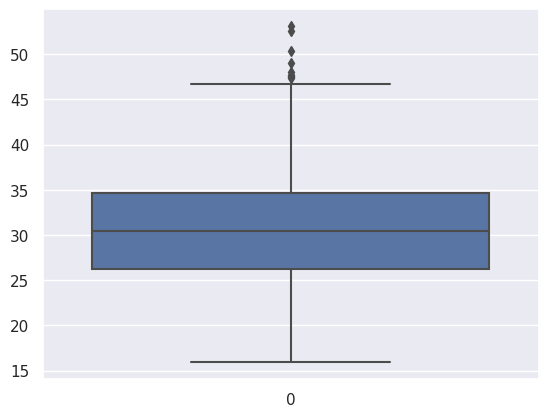

In [68]:
# Is there an outlier in the "bmi" variable? Please review
sns.boxplot(insurance_df['bmi'])
# yes, there is outliers

In [69]:
# Examine the relationship between “bmi” and “charges”.
insurance_df[['bmi','charges']]

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


In [78]:
#Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
insurance_df[['region','smoker', 'bmi']]


,region,smoker,bmi
0,southwest,yes,27.900
1,southeast,no,33.770
2,southeast,no,33.000
3,northwest,no,22.705
4,northwest,no,28.880
...,...,...,...
1333,northwest,no,30.970
1334,northeast,no,31.920
1335,southeast,no,36.850
1336,southwest,no,25.800


<Axes: ylabel='Density'>

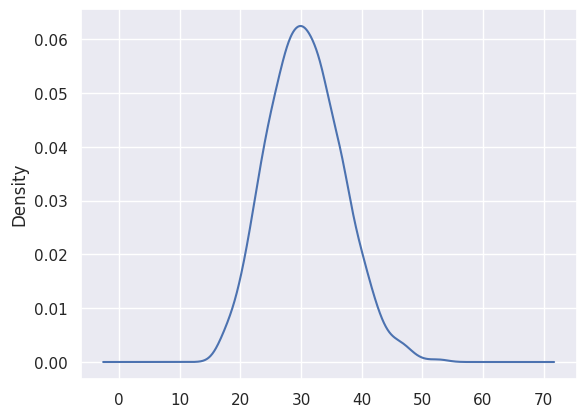

In [43]:
#data visualization for bmi
insurance_df['bmi'].plot(kind='kde')

<Axes: >

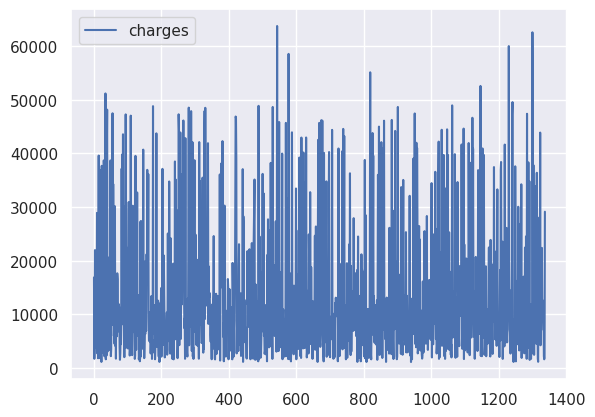

In [46]:
#visualize the relationship between “smoker” and “charges”
insurance_df[['smoker','charges']].plot()

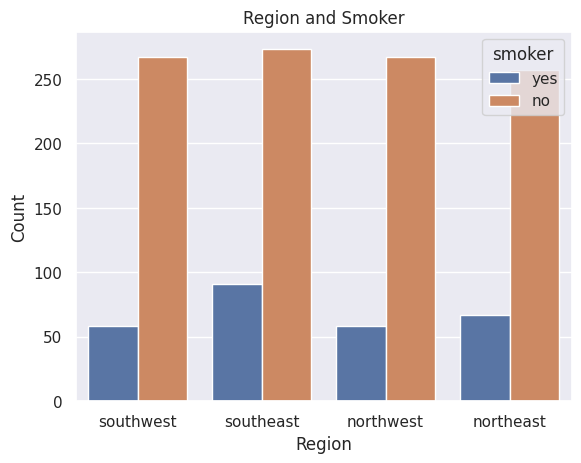

In [34]:
#visualize the relationship between region and “smoker”
sns.countplot(data=insurance_df, x='region', hue='smoker')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region and Smoker")
plt.show()

<Axes: xlabel='bmi', ylabel='sex'>

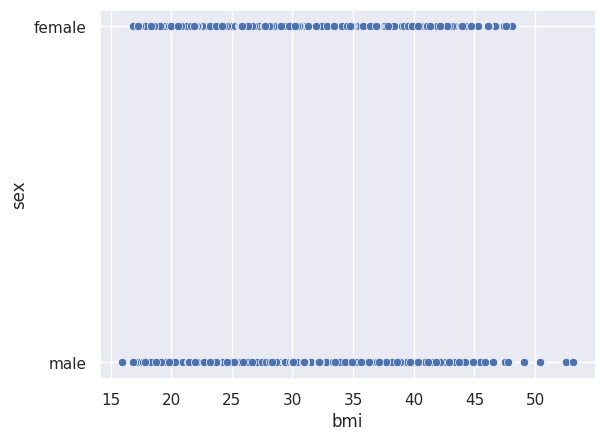

In [62]:
# visualize the relationship between “bmi” and “sex”.
sns.scatterplot(x="bmi", y="sex", data=insurance_df)

<Axes: xlabel='bmi', ylabel='children'>

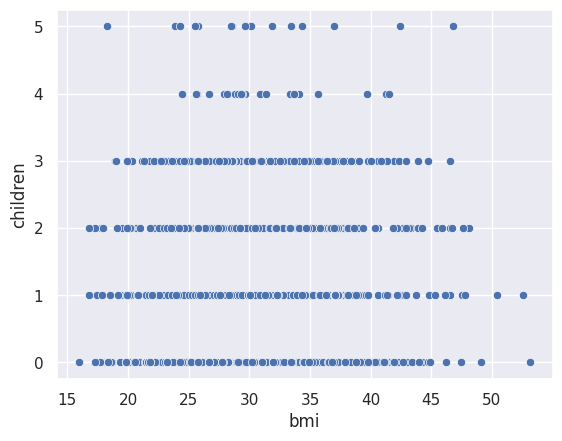

In [64]:
#visualize the relationship between “bmi” and “children”.
sns.scatterplot(x="bmi", y="children", data=insurance_df)

<Axes: xlabel='bmi', ylabel='charges'>

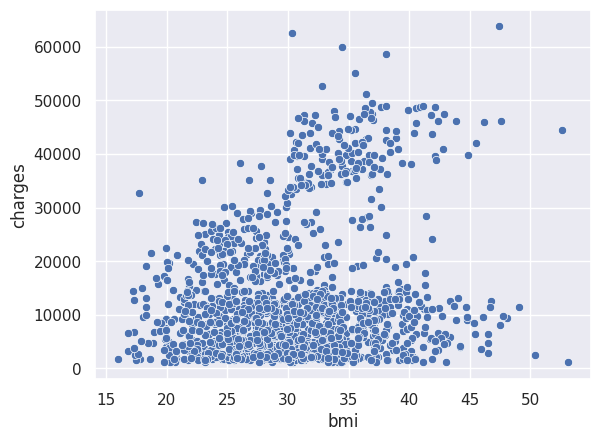

In [71]:
# visualize the relationship between “bmi” and “charges”.
sns.scatterplot(x="bmi", y="charges", data=insurance_df)

<Axes: xlabel='region'>

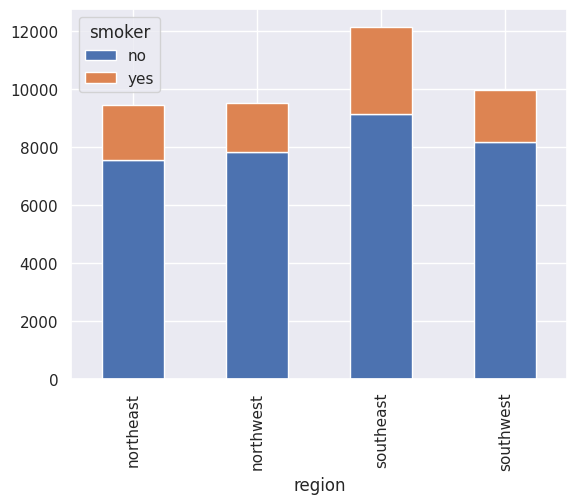

In [88]:
#visualize the relationship between “region”, “smoker” and “bmi” using bar plot.
(insurance_df.pivot_table(index='region', columns='smoker', values='bmi',
                aggfunc='sum', fill_value=0)
   .plot.bar(stacked=True)
)


# Data Preprocessing

● preparing the data you have, for training the model.

● Label Encoding and One-Hot Encoding techniques to deal with categorical
variables.

● splitting your dataset into X_train,X_test, y_train, y_test.

● scaling the dataset by normalizing it(Min-Max Scaling or Standard Scaling).

In [91]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 5.1 MB/s eta 0:00:00


In [94]:
#preparing the data you have, for training the model.

# preprocess to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.
insurance_df.drop_duplicates(inplace=True)

Q1=insurance_df['bmi'].quantile(0.25)
Q2=insurance_df['bmi'].quantile(0.5)
Q3=insurance_df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print("low limit : ", lowlim, "upper limit : ", upplim)

from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
insurance_df[['bmi']]=arb.fit_transform(insurance_df[['bmi']])

low limit :  13.674999999999994 upper limit :  47.31500000000001


In [95]:
# prepare data for X and y variables (features : age	sex	bmi	children	smoker	region	charges)
# Create the X variable for features
X = insurance_df.loc[:, ['age', 'sex', 'bmi', 'children','smoker','region']]
# Create the y variable for output labels
y = insurance_df.loc[:, 'charges']

In [101]:
#abel Encoding technique to deal with categorical variables.

# Create an LabelEncoder object
encoder = LabelEncoder()
# Encode the features to integers inside a for loop
for i in X.columns:
  X[i] = encoder.fit_transform(X[i])
# Encode the ouput labels to integers
y = encoder.fit_transform(y)


In [113]:
#splitting dataset into X_train,X_test, y_train, y_test

# Split the dataset into train and test sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [103]:
# scaling the dataset by normalizing it(Min-Max Scaling or Standard Scaling).
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
standard_X = scaler.fit_transform(X)


# Model Selection
● Select several regression models and train them with the preprocessed data.

● Examine the performances of the selected models using cross validation.

● Choose the best performing model

In [118]:
# Create an object using the LinearRegression() class
lrmodel=LinearRegression()
# Train the Linear Regression model
lrmodel.fit(X_train,y_train)
print("* linear regression * ")
print("train score : ", lrmodel.score(X_train,y_train))
print("test score : ",lrmodel.score(X_test, y_test))
print("cross validation score : ", cross_val_score(lrmodel,X,y,cv=5,).mean())

* linear regression * 
train score :  0.743455458009564
test score :  0.8232847831705921
cross validation score :  0.7571672149637079


In [124]:
# Create an object using the RidgeClassifier() class
ridge_classifier_model = RidgeClassifier()
# Train the Ridge Classifier model
ridge_classifier_model.fit(X_train,y_train)
print("* Ridge Classifier * ")
print("train score : ", ridge_classifier_model.score(X_train,y_train))
print("test score : ",ridge_classifier_model.score(X_test, y_test))
#print("cross validation score : ", cross_val_score(ridge_classifier_model,X,y,cv=2,).mean())


* Ridge Classifier * 
train score :  0.08606173994387278
test score :  0.0


In [125]:
# Create an object using the LogisticRegression() class
logistic_model = LogisticRegression()
# Train the Logistic Classifier model
logistic_model.fit(X_train,y_train)
print("* logistic regression * ")
print("train score : ", logistic_model.score(X_train,y_train))
print("test score : ",logistic_model.score(X_test, y_test))
#print("cross validation score : ", cross_val_score(logistic_model,X,y,cv=5,).mean())

* logistic regression * 
train score :  0.06735266604303088
test score :  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
# Create an object using the DecisionTreeClassifier() class
decision_tree_model = DecisionTreeClassifier()
# Train the Decision Tree model
decision_tree_model.fit(X_train,y_train)
print("* DecisionTreeClassifier * ")
print("train score : ", decision_tree_model.score(X_train,y_train))
print("test score : ",decision_tree_model.score(X_test, y_test))
#print("cross validation score : ", cross_val_score(decision_tree_model,X,y,cv=5,).mean())

* DecisionTreeClassifier * 
train score :  1.0
test score :  0.0


In [129]:
# Create an object using the GaussianNB() class
naive_bayes_model = GaussianNB()
# Train the Naive Bayes model
naive_bayes_model.fit(X_train,y_train)
print("* Naive Bayes * ")
print("train score : ", naive_bayes_model.score(X_train,y_train))
print("test score : ",naive_bayes_model.score(X_test, y_test))
#print("cross validation score : ", cross_val_score(naive_bayes_model,X,y,cv=5,).mean())

* Naive Bayes * 
train score :  1.0
test score :  0.0


In [131]:
# Create an object using the MLPClassifier() class
neural_network_model = MLPClassifier()
# Train the Neural Network model
neural_network_model.fit(X_train,y_train)
print("*  Neural Network model * ")
print("train score : ", neural_network_model.score(X_train,y_train))
print("test score : ",neural_network_model.score(X_test, y_test))
#print("cross validation score : ", cross_val_score(neural_network_model,X,y,cv=5,).mean())

*  Neural Network model * 
train score :  0.5837231057062675
test score :  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [134]:
# Create an object using SVR
from sklearn.metrics import r2_score
svrmodel=SVR()
# Train the SVR
svrmodel.fit(X_train,y_train)
# Predict
ypredtrain1=svrmodel.predict(X_train)
ypredtest1=svrmodel.predict(X_test)
print("SVR")
print("train r2 score : ",r2_score(y_train,ypredtrain1))
print("test r2 score : ", r2_score(y_test,ypredtest1))
print("cross validation score : ", cross_val_score(svrmodel,X,y,cv=5,).mean())


SVR
train r2 score :  0.011651109864564746
test r2 score :  0.012363481173529034
cross validation score :  0.011213721076662986


In [136]:
# Create ab object using RandomForestRegressor
rfmodel=RandomForestRegressor(random_state=42)
# Train the RandomForestRegressor
rfmodel.fit(X_train,y_train)
# Predict
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)
print("RandomForestRegressor")
print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print("cross validation score : ", cross_val_score(rfmodel,X,y,cv=5,).mean())

RandomForestRegressor
0.9663609498779255
0.8192264663148279
cross validation score :  0.7786167179089094


Random Forest Regressor is the best performing model

# Hyper-parameter Optimization
● Optimize the hyper-parameters of the model selected in the previous step.

● Optimize parameters with Grid Search. (Grid Search or Randomized Search)

In [138]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}

# Create ab object using GridSearchCV
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
# Train the GridSearchCV
grid.fit(X_train,y_train)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(X_train,y_train)
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)
print("Grid Search")
print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print("cross validation score : ", cross_val_score(rfmodel,X,y,cv=5,).mean())

{'n_estimators': 150}
Grid Search
0.9674489593533153
0.8200848364091714
cross validation score :  0.779242044056893


In [140]:
# Create ab object using GradientBoostingRegressor
gbmodel=GradientBoostingRegressor()
# Train the GradientBoostingRegressor
gbmodel.fit(X_train,y_train)
#Predict
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print("GradientBoostingRegressor")
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print("cross validation score : ", cross_val_score(gbmodel,X,y,cv=5,).mean())

GradientBoostingRegressor
0.8574152281884266
0.864793383108013
cross validation score :  0.8088236000962548


In [141]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
#train with grid
grid.fit(X_train,y_train)
print("best parameters")
print(grid.best_params_)
#create GradientBoostingRegressor model object
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
#train GradientBoostingRegressor
gbmodel.fit(X_train,y_train)
#predict
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print("GradientBoostingRegressor")
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print("cross validation score : ", cross_val_score(gbmodel,X,y,cv=5,).mean())


best parameters
{'learning_rate': 0.19, 'n_estimators': 20}
GradientBoostingRegressor
0.8251256369604483
0.8641494744271428
cross validation score :  0.815012856617853


# Model Evaluation
● Evaluate the optimized model using regression model evaluation metrics.
(Ex. Mean
Squared Error, Mean Absolute Error etc.)

In [157]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}

# Create ab object using GridSearchCV
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
# Train the GridSearchCV
grid.fit(X_train,y_train)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(X_train,y_train)
# model evaluation with optimized model
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)
print("Grid Search")
print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print("cross validation score : ", cross_val_score(rfmodel,X,y,cv=5,).mean())

{'n_estimators': 150}
Grid Search
0.9674489593533153
0.8200848364091714
cross validation score :  0.779242044056893


In [161]:
from sklearn.metrics import mean_absolute_error
#Mean Absolute Error
print("Mean Absolute Error : ",mean_absolute_error(ypredtest2, y_test))

Mean Absolute Error :  84.93967661691542


In [162]:
from sklearn.metrics import mean_squared_error
#Mean Squared Error
print("Mean Squared Error : ",mean_squared_error(ypredtest2, y_test))

Mean Squared Error :  28531.409215381424
